In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('application_data.csv')

In [3]:
dat.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [4]:
dat.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


C:\Users\Pushkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


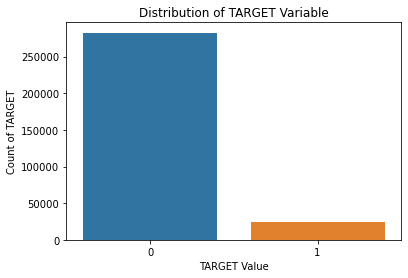

In [5]:
sns.countplot(dat.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [6]:
def column_wise_null_percentage(data1):
    output = round(data1.isnull().sum()/len(data1.index)*100,2)
    return output

In [7]:
na_val_percent = column_wise_null_percentage(dat)
na_val_percent

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

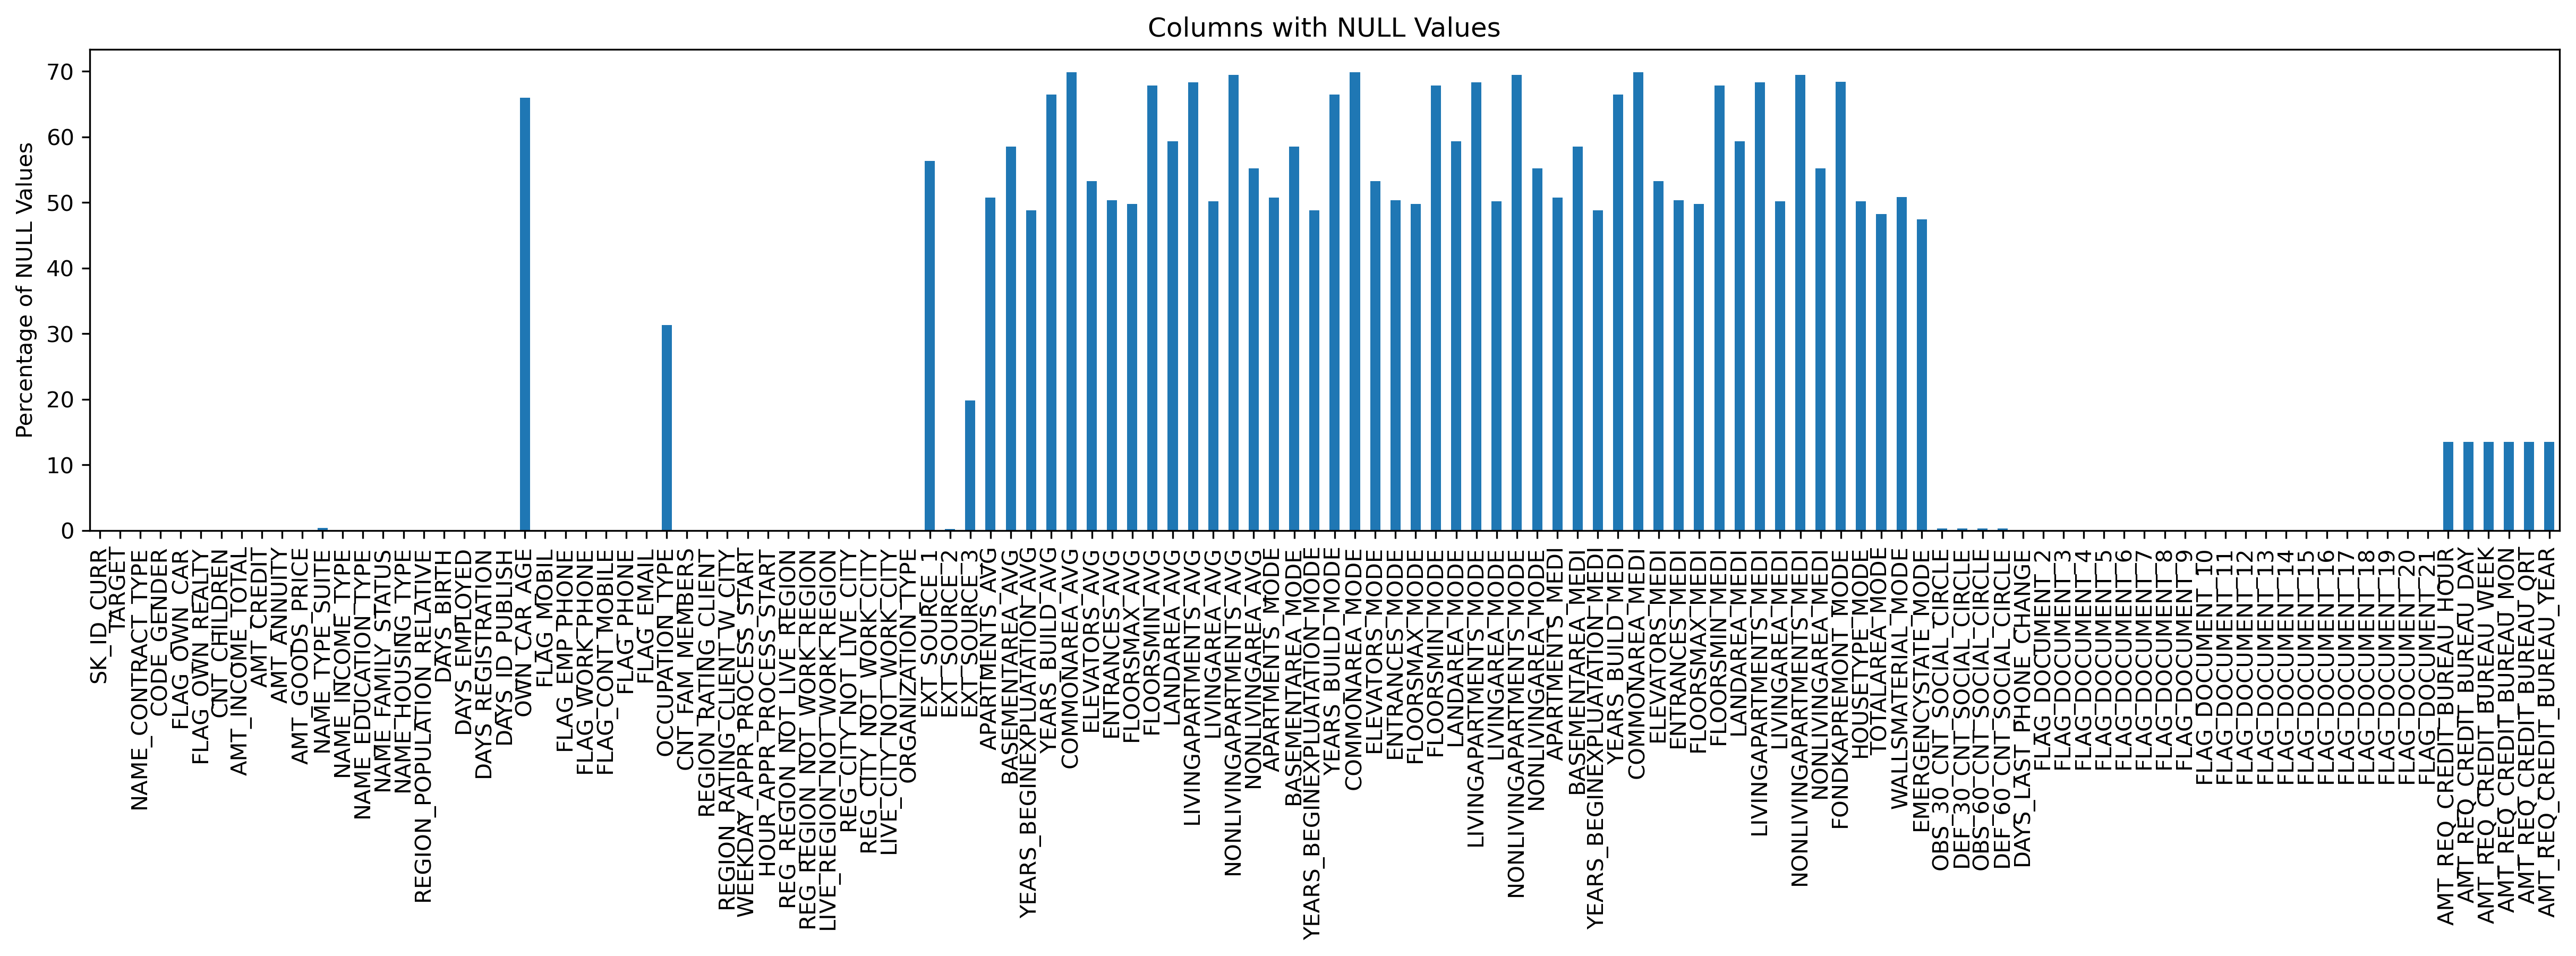

In [8]:
plt.figure(figsize= (20,4),dpi=300)
na_val_percent.plot(kind = 'bar')
plt.title ('Columns with NULL Values')
plt.ylabel('Percentage of NULL Values')
plt.show()

In [9]:
#Columns with more than 50% of null values to be removed
na_col_50 = na_val_percent[na_val_percent>50]
print("Number of columns having null value more than 50% :", len(na_col_50.index))
print(na_col_50)

Number of columns having null value more than 50% : 41
OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI          

In [10]:
dat = dat.drop(na_col_50.index, axis =1)
dat

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
categorical_cols = ['FLAG_MOBIL', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
                    'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                    'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
                    'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE']
for col in categorical_cols:
    dat[col] = dat[col].astype('category')

In [12]:
not_required_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

In [13]:
dat.drop(labels=not_required_columns,axis=1,inplace=True)

In [14]:
dat

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
defaulters=dat[dat.TARGET==1]
nondefaulters=dat[dat.TARGET==0]
defaulters.shape

(24825, 42)

In [16]:
#Calculating percentage defaulters and non defaulters

percentage_defaulters=round(100*len(defaulters)/(len(defaulters)+len(nondefaulters)),2)

percentage_nondefaulters=round(100*len(nondefaulters)/(len(defaulters)+len(nondefaulters)),2)

print('Count of defaulters:', len(defaulters))
print('Count of non defaulters:', len(nondefaulters))


print('People who paid their loan: ' , percentage_nondefaulters, '%' )
print('People who didnt pay their loan : ', percentage_defaulters, '%' )

Count of defaulters: 24825
Count of non defaulters: 282686
People who paid their loan:  91.93 %
People who didnt pay their loan :  8.07 %


In [17]:
#Columns having number of days and has negative values to be converted into positive
dat['DAYS_LAST_PHONE_CHANGE'] = dat['DAYS_LAST_PHONE_CHANGE'].abs()
dat['DAYS_REGISTRATION'] = dat['DAYS_REGISTRATION'].abs()
dat['DAYS_BIRTH'] = dat['DAYS_BIRTH'].abs()
dat['DAYS_ID_PUBLISH'] = dat['DAYS_ID_PUBLISH'].abs()
dat['DAYS_EMPLOYED'] = dat['DAYS_EMPLOYED'].abs()

In [18]:
#Removing XNA values which can be found in Gender column
dat = dat.drop(dat.loc[dat['CODE_GENDER']=='XNA'].index)
dat[dat['CODE_GENDER']=='XNA'].shape

(0, 42)

In [19]:
def charts(var, label_orientation,layout):
    if(layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_orientation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_orientation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

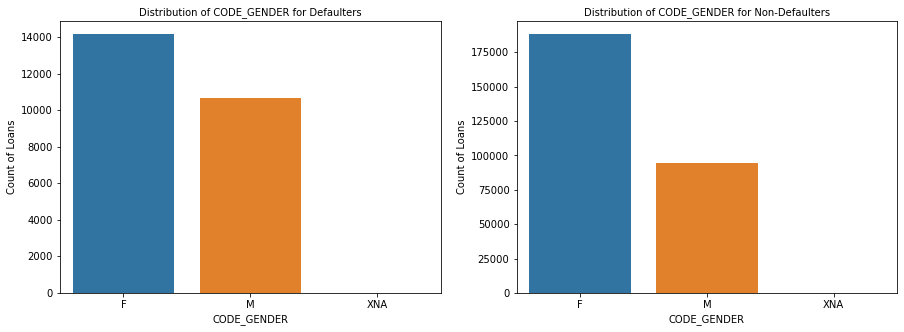

In [20]:
charts('CODE_GENDER', label_orientation=False,layout=True)

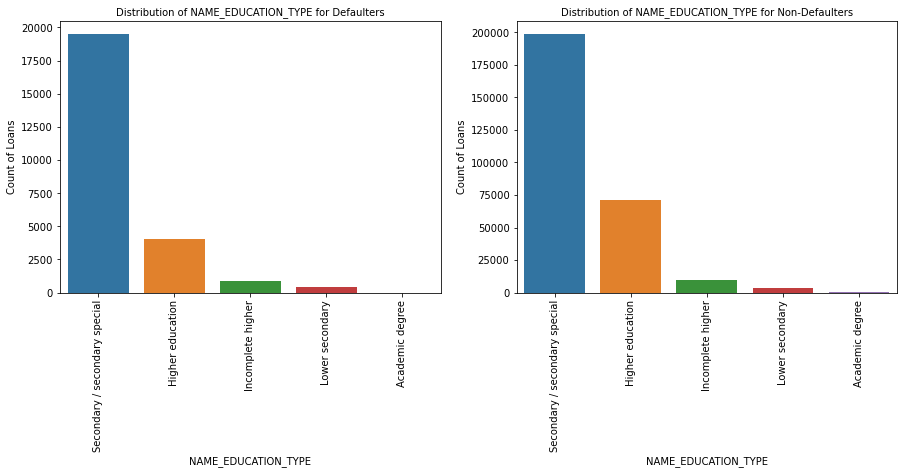

In [21]:
charts('NAME_EDUCATION_TYPE', True,True)

Univariate Analysis

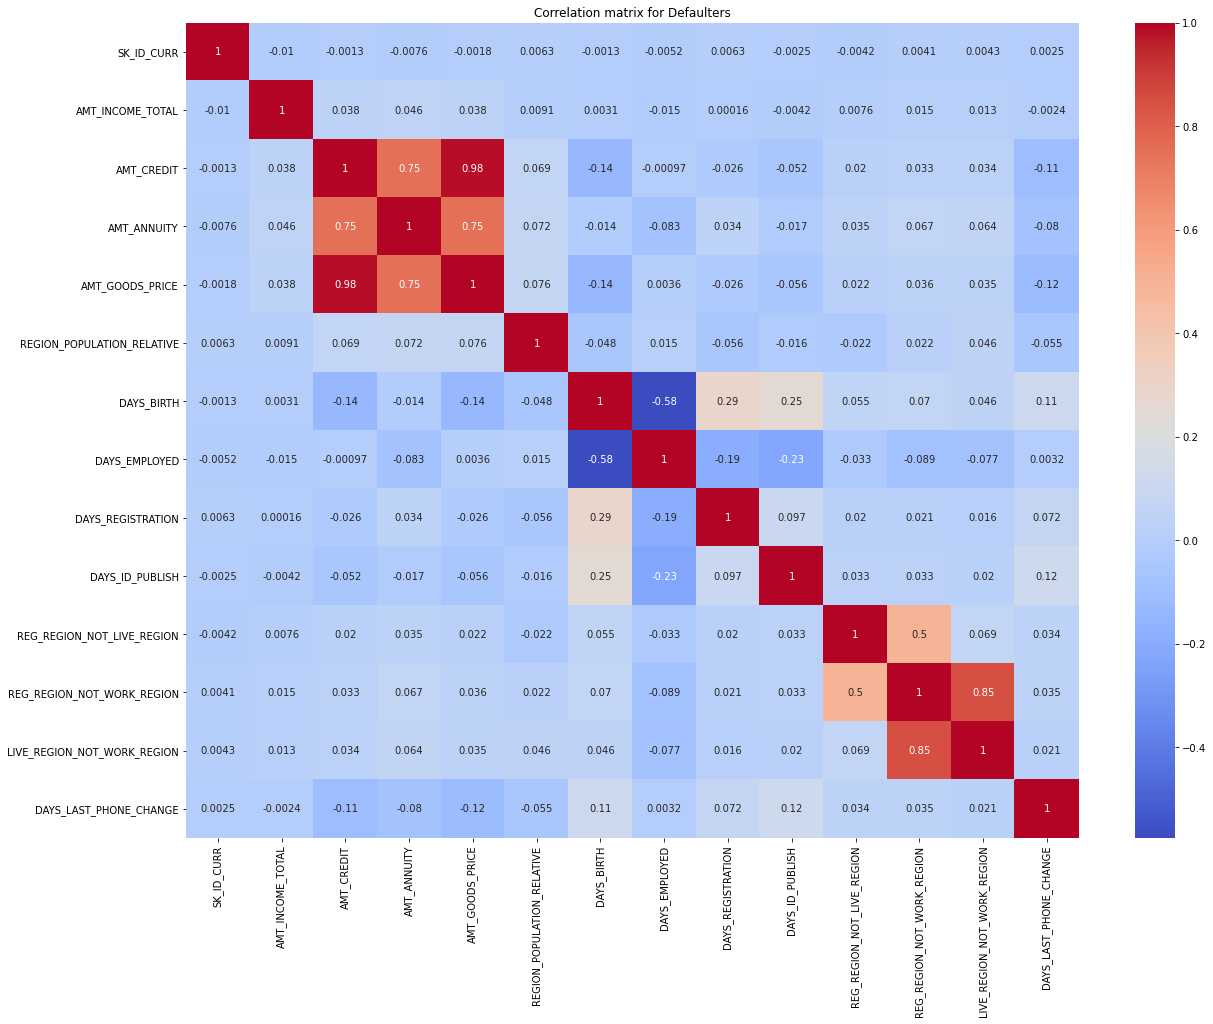

In [22]:
# for Defaulters
plt.figure(figsize=(20,15)) 
sns.heatmap(defaulters.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for Defaulters')
plt.show()

We can see correlation between amount credit and amount annuity for loan defaulters

In [23]:
#Top most correlation for defaulters
correlation = defaulters.corr()
correlation_df = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
correlation_df = correlation_df.unstack().reset_index().dropna(subset = [0])
correlation_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_df['Corr_abs'] = abs(correlation_df['Correlation_Value'])
correlation_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_df.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
58,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
179,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
44,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
104,DAYS_EMPLOYED,DAYS_BIRTH,-0.575097,0.575097
164,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937,0.497937
118,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
132,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
133,DAYS_ID_PUBLISH,DAYS_EMPLOYED,-0.226470,0.226470
119,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929


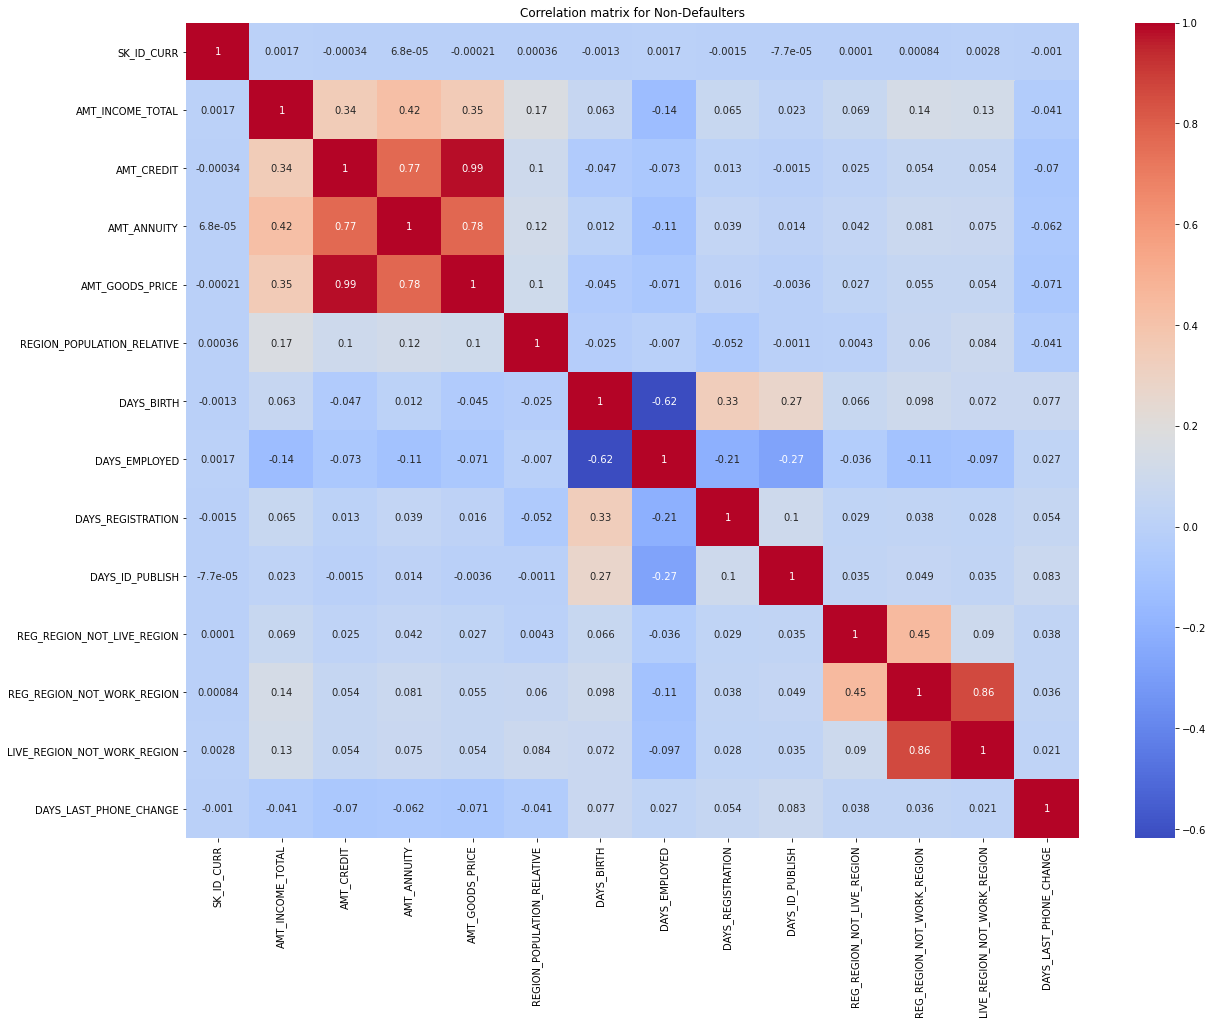

In [24]:
#For non-defaulters
plt.figure(figsize=(20,15)) 
sns.heatmap(nondefaulters.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for Non-Defaulters')
plt.show()

We can see correlation between amount credit and amount goods price, also amount credit and amount annuity

In [25]:
#Top most correlation in non-defaulters
correlation = nondefaulters.corr()
correlation_df = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
correlation_df = correlation_df.unstack().reset_index().dropna(subset = [0])
correlation_df.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_df['Corr_abs'] = abs(correlation_df['Correlation_Value'])
correlation_df.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_df.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
58,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
179,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
44,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
104,DAYS_EMPLOYED,DAYS_BIRTH,-0.618048,0.618048
164,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.446101,0.446101
43,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
29,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
118,DAYS_REGISTRATION,DAYS_BIRTH,0.333151,0.333151


In [26]:
dat.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Businessman                       NaN       NaN   
                              Commercial associate    274688.372093  247500.0   
                              Maternity leave                   NaN       NaN   
                              Pensioner               203919.230769  155700.0   
                              State servant           258847.826087  225000.0   
                              Student                           NaN       NaN   
                              Unemployed                        NaN       NaN   
                              Working                 226312.500000  202500.0   
Higher education              Businessman             652500.000000  495000.0   
                              Commercial associate    242283.998486  202500.0   
                              Maternity leave         195000.000000  135000.0   
                              Pensioner               171455.114974  148500.0   
                              State servant           207116.161080  180000.0   
                              Student                 231000.000000  175500.0   
                              Unemployed              189000.000000  180000.0   
                              Working                 194014.858092  174150.0   
Incomplete higher             Businessman                       NaN       NaN   
                              Commercial associate    206220.154898  180000.0   
                              Maternity leave                   NaN       NaN   
                              Pensioner               149437.155405  135000.0   
                              State servant           173589.989610  157500.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              126000.000000   63000.0   
                              Working                 170659.490600  157500.0   
Lower secondary               Businessman                       NaN       NaN   
                              Commercial associate    168173.628261  144000.0   
                              Maternity leave                   NaN       NaN   
                              Pensioner               106468.010464   90000.0   
                              State servant           143250.000000  119250.0   
                              Student                           NaN       NaN   
                              Unemployed                        NaN       NaN   
                              Working                 140070.652174  135000.0   
Secondary / secondary special Businessman                       NaN       NaN   
                              Commercial associate    181368.704601  157500.0   
                              Maternity leave          58500.000000   58500.0   
                              Pensioner               130863.482560  112500.0   
                              State servant           159979.349061  135000.0   
                              Student                 138681.818182  144000.0   
                              Unemployed               70753.846154   63000.0   
                              Working                 154261.325853  135000.0   

                                                                         
                                                     count          max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                           
Academic degree               Businessman                0          NaN  
                              Commercial associate      43     900000.0  
                              Maternity leave            0          NaN  
                              Pensioner                 26     747000.0  
                              State servant      

**We can see that most of the loans taken were by the people from higher secondary group**

In [27]:
def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

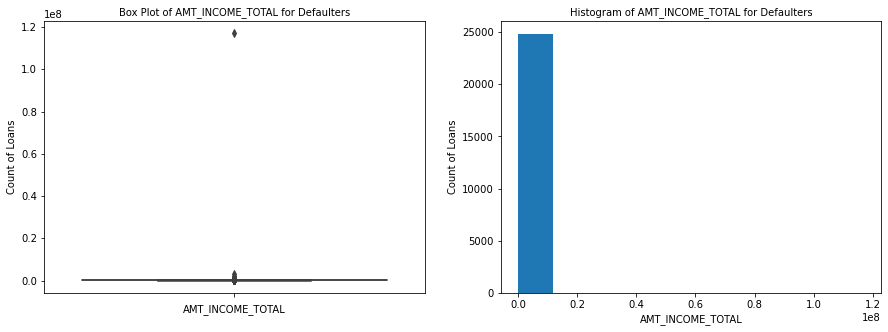

In [28]:
plot_boxhist('AMT_INCOME_TOTAL')

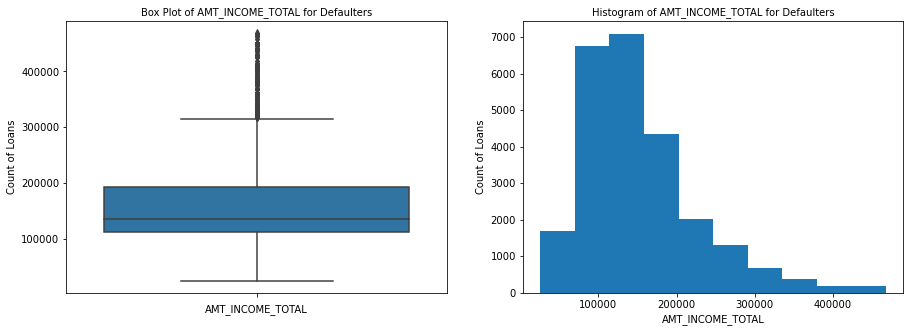

In [29]:
dat=dat[dat.AMT_INCOME_TOTAL<np.nanpercentile(dat['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=dat[dat.TARGET==1] 
nondefaulters=dat[dat.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

This tells us that most of the people with payment have an income range between 100000-200000

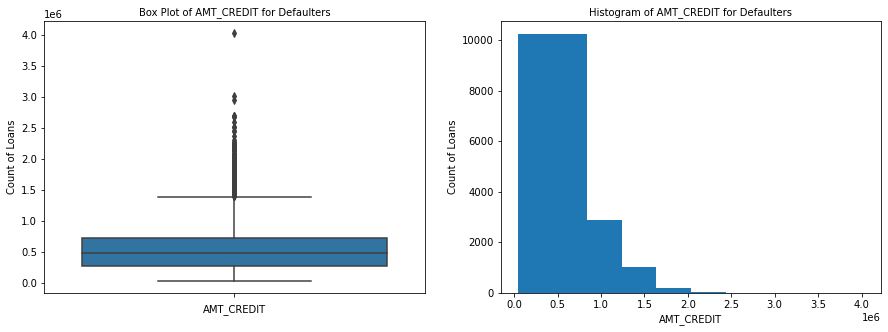

In [30]:
plot_boxhist('AMT_CREDIT')

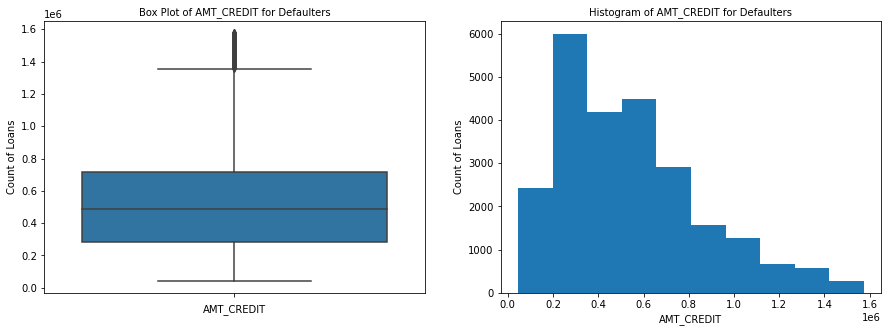

In [32]:
#Removing all entries above 99 percentile
dat=dat[dat['AMT_CREDIT']<np.nanpercentile(dat['AMT_CREDIT'], 99)]

#update dataframes
defaulters=dat[dat.TARGET==1] 
nondefaulters=dat[dat.TARGET==0]

plot_boxhist('AMT_CREDIT')

we observe that the credit amount lies between 250000 to around 500000 for defaulters

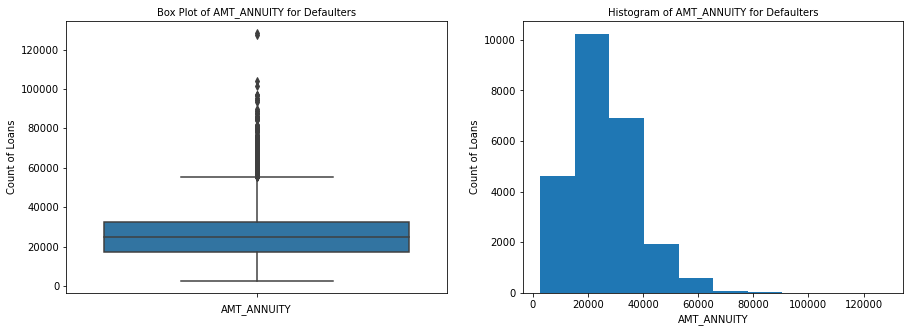

In [33]:
plot_boxhist('AMT_ANNUITY')

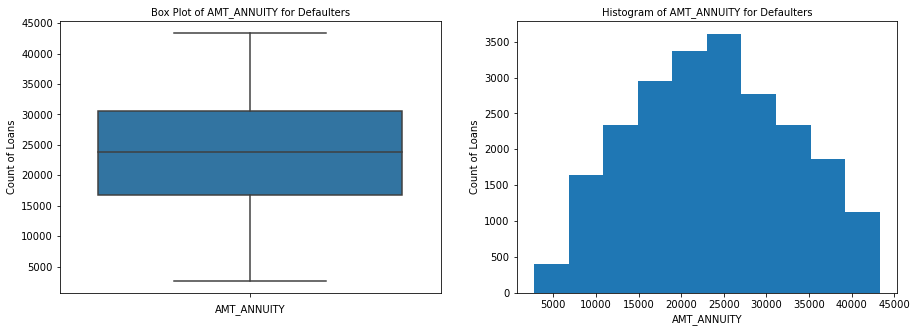

In [35]:
#Removing all entries above 99 percentile
dat=dat[dat['AMT_ANNUITY']<np.nanpercentile(dat['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=dat[dat.TARGET==1] 
nondefaulters=dat[dat.TARGET==0]

plot_boxhist('AMT_ANNUITY')

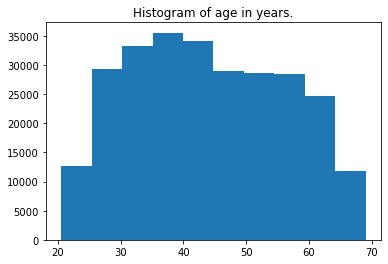

In [38]:
#Deriving new metric Age from Days Birth
dat['AGE'] = dat['DAYS_BIRTH'] / 365
plt.hist(dat['AGE']);
plt.title('Histogram of age in years.');

Age seems to be fairly distributed

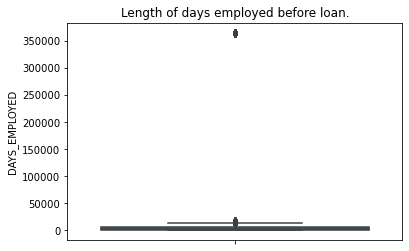

In [40]:
sns.boxplot(y=dat['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');

In [41]:
dat['DAYS_EMPLOYED'].describe()

count    267585.000000
mean      71049.959437
std      142181.303971
min           0.000000
25%         920.000000
50%        2208.000000
75%        6068.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

There is an outlier here. The max value is 365243 days which is not practically possible. This might be an error and we can replace this value with null

In [42]:
dat['DAYS_EMPLOYED']=dat['DAYS_EMPLOYED'].replace(365243, np.nan)
dat['DAYS_EMPLOYED'].describe()

count    216928.000000
mean       2350.036625
std        2331.944110
min           0.000000
25%         748.000000
50%        1608.000000
75%        3121.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [45]:
#Deriving variable "Years Employed" from days employed
dat['YEARS_EMPLOYED'] = (dat['DAYS_EMPLOYED']/365)

#update dataframes
defaulters=dat[dat.TARGET==1] 
nondefaulters=dat[dat.TARGET==0]

C:\Users\Pushkar\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pushkar\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


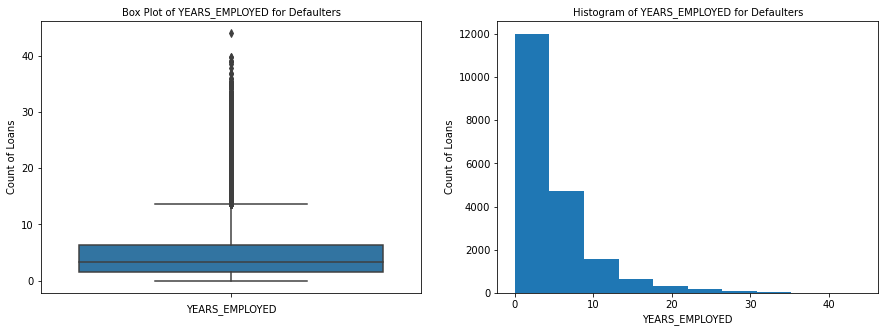

In [46]:
plot_boxhist('YEARS_EMPLOYED')

A large number of entries have 0 which means, a lot of people don't work.

In [47]:
dat.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})

YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                5.544292  4.838356       3   7.175342  52.487671
Commercial associate       5.721991  4.000000   57963  48.071233  39.383562
Maternity leave            6.453425  6.260274       4   9.942466  37.649315
Pensioner                 13.550137  7.673973      10  35.246575  60.512329
State servant              9.263672  6.995890   18186  48.172603  40.476712
Student                    6.765582  4.954795      16  21.931507  41.215068
Unemployed                      NaN       NaN       0        NaN  45.860274
Working                    6.367942  4.339726  140746  49.073973  39.663014

We see that Pensioners comprise a lot of non-working people, which is normal. Working people seemed to have worked for many years.

In [48]:
dat.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL  \
                                                               mean   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Businessman                       NaN   
                              Commercial associate    229344.827586   
                              Maternity leave                   NaN   
                              Pensioner               163620.000000   
                              State servant           230062.500000   
                              Student                           NaN   
                              Unemployed                        NaN   
                              Working                 205779.661017   
Higher education              Businessman             195000.000000   
                              Commercial associate    199886.053163   
                              Maternity leave         112500.000000   
                              Pensioner               150518.289935   
                              State servant           182533.202101   
                              Student                 164700.000000   
                              Unemployed              204300.000000   
                              Working                 172912.188933   
Incomplete higher             Businessman                       NaN   
                              Commercial associate    181991.278991   
                              Maternity leave                   NaN   
                              Pensioner               140548.470652   
                              State servant           164513.910180   
                              Student                 157500.000000   
                              Unemployed              157500.000000   
                              Working                 158457.389646   
Lower secondary               Businessman                       NaN   
                              Commercial associate    156896.978774   
                              Maternity leave                   NaN   
                              Pensioner               103418.348884   
                              State servant           135703.125000   
                              Student                           NaN   
                              Unemployed                        NaN   
                              Working                 134705.908809   
Secondary / secondary special Businessman                       NaN   
                              Commercial associate    166680.263534   
                              Maternity leave          58500.000000   
                              Pensioner               124263.443688   
                              State servant           149319.604758   
                              Student                 130050.000000   
                              Unemployed               70322.727273   
                              Working                 145253.262804   

                                                                       \
                                                       median   count   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                          
Academic degree               Businessman                 NaN       0   
                              Commercial associate  225000.00      29   
                              Maternity leave             NaN       0   
                              Pensioner             135000.00      20   
                              State servant         198000.00      16   
                              Student                     NaN       0   
                              Unemployed                  NaN       0   
                              Working               180000.00      59   
Higher education              Businessman           180000.00       3   
                              Commercial associate  180000.00   17634   
                              Maternity leave   

We can see that most of the loans are taken by working people with secondary education.

Bi-Variate Analysis 

In [54]:
#selecting columns for correlation, removing cols for floor and house ec

cols=[ 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [55]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
AMT_GOODS_PRICE,1.000,0.740,0.113,0.978,0.273,0.043,0.058,0.055,0.118,0.147
AMT_ANNUITY,0.740,1.000,0.071,0.756,0.336,-0.028,0.029,0.013,0.048,0.016
DAYS_LAST_PHONE_CHANGE,0.113,0.071,1.000,0.103,0.081,0.071,0.055,0.128,0.169,0.111
AMT_CREDIT,0.978,0.756,0.103,1.000,0.275,0.042,0.051,0.051,0.111,0.145
AMT_INCOME_TOTAL,0.273,0.336,0.081,0.275,1.000,-0.031,0.092,0.002,0.027,-0.004
DAYS_REGISTRATION,0.043,-0.028,0.071,0.042,-0.031,1.000,0.054,0.101,0.140,0.293
REGION_POPULATION_RELATIVE,0.058,0.029,0.055,0.051,0.092,0.054,1.000,0.010,0.017,0.050
DAYS_ID_PUBLISH,0.055,0.013,0.128,0.051,0.002,0.101,0.010,1.000,0.099,0.263
DAYS_EMPLOYED,0.118,0.048,0.169,0.111,0.027,0.140,0.017,0.099,1.000,0.308
DAYS_BIRTH,0.147,0.016,0.111,0.145,-0.004,0.293,0.050,0.263,0.308,1.000


In [56]:
defaulters_correlation.head(10).index

Index(['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED',
       'DAYS_BIRTH'],
      dtype='object')

In [57]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_GOODS_PRICE    AMT_GOODS_PRICE     1.000000
AMT_CREDIT         AMT_GOODS_PRICE     0.977768
AMT_ANNUITY        AMT_CREDIT          0.756067
                   AMT_GOODS_PRICE     0.740496
                   AMT_INCOME_TOTAL    0.336465
DAYS_BIRTH         DAYS_EMPLOYED       0.308420
DAYS_REGISTRATION  DAYS_BIRTH          0.292616
AMT_CREDIT         AMT_INCOME_TOTAL    0.274796
AMT_GOODS_PRICE    AMT_INCOME_TOTAL    0.272963
DAYS_ID_PUBLISH    DAYS_BIRTH          0.263212
dtype: float64

In [58]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_ANNUITY                 REGION_POPULATION_RELATIVE    0.029134
DAYS_EMPLOYED               AMT_INCOME_TOTAL              0.027429
REGION_POPULATION_RELATIVE  DAYS_EMPLOYED                 0.017149
DAYS_BIRTH                  AMT_ANNUITY                   0.015573
DAYS_ID_PUBLISH             AMT_ANNUITY                   0.012947
                            REGION_POPULATION_RELATIVE    0.009676
AMT_INCOME_TOTAL            DAYS_ID_PUBLISH               0.002298
DAYS_BIRTH                  AMT_INCOME_TOTAL             -0.004075
DAYS_REGISTRATION           AMT_ANNUITY                  -0.028191
AMT_INCOME_TOTAL            DAYS_REGISTRATION            -0.030730
dtype: float64

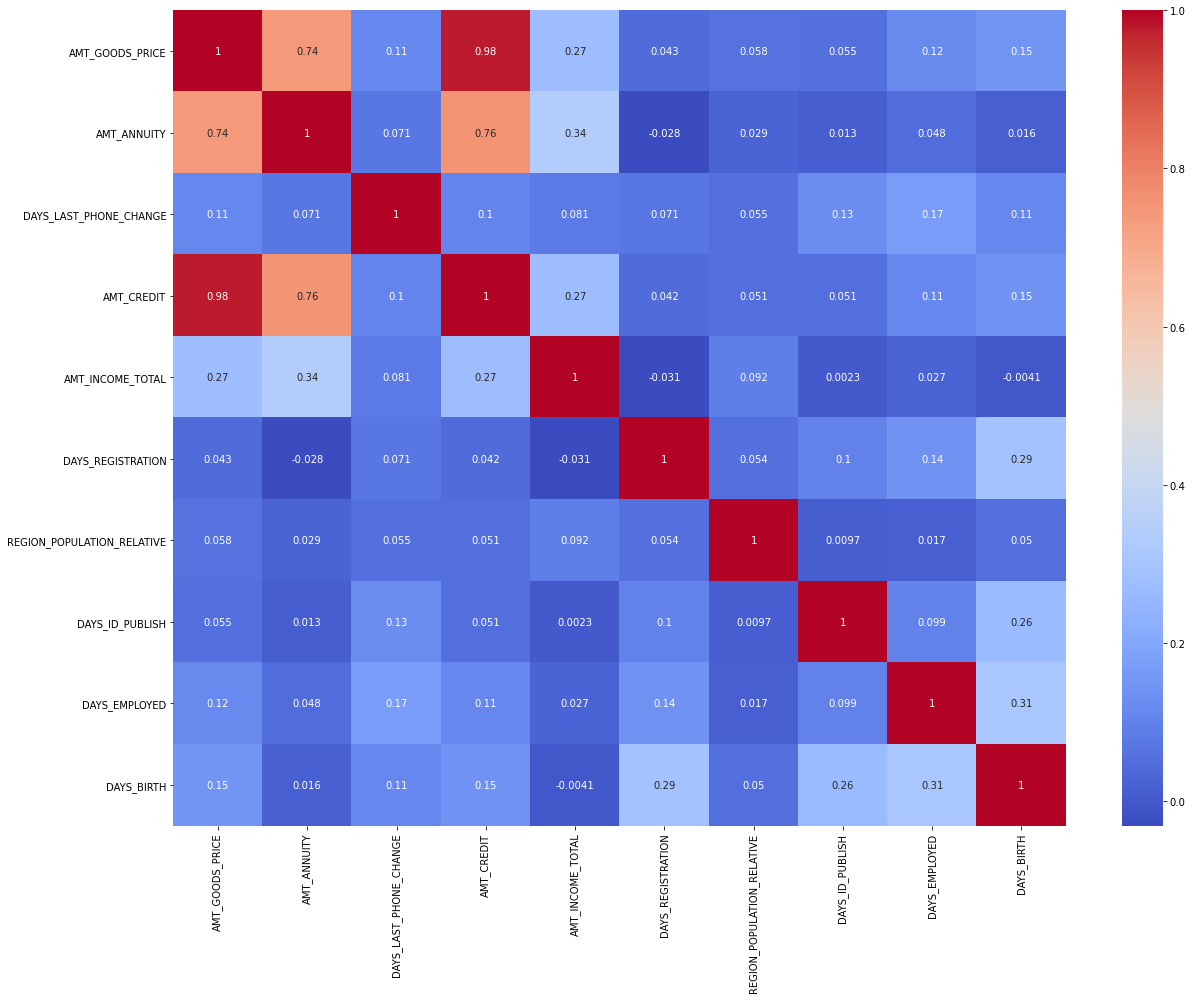

In [60]:
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(defaulters_correlation, cmap="coolwarm", annot=True)
plt.show()

3 most positive correlations
    AMT_CREDIT - AMT_GOODS_PRICE
    AMT_CREDIT - AMT_ANNUITY
    AMT_GOODS_PRICE - AMT_ANNUITY

In [61]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
AMT_GOODS_PRICE,1.000,0.776,0.076,0.982,0.304,-0.004,0.048,0.005,0.086,0.050
AMT_ANNUITY,0.776,1.000,0.065,0.786,0.368,-0.032,0.056,-0.018,0.046,-0.015
DAYS_LAST_PHONE_CHANGE,0.076,0.065,1.000,0.072,0.057,0.051,0.038,0.087,0.137,0.075
AMT_CREDIT,0.982,0.786,0.072,1.000,0.303,-0.001,0.044,0.002,0.084,0.052
AMT_INCOME_TOTAL,0.304,0.368,0.057,0.303,1.000,-0.076,0.151,-0.034,0.030,-0.093
DAYS_REGISTRATION,-0.004,-0.032,0.051,-0.001,-0.076,1.000,0.049,0.104,0.174,0.337
REGION_POPULATION_RELATIVE,0.048,0.056,0.038,0.044,0.151,0.049,1.000,0.003,-0.009,0.027
DAYS_ID_PUBLISH,0.005,-0.018,0.087,0.002,-0.034,0.104,0.003,1.000,0.090,0.289
DAYS_EMPLOYED,0.086,0.046,0.137,0.084,0.030,0.174,-0.009,0.090,1.000,0.354
DAYS_BIRTH,0.050,-0.015,0.075,0.052,-0.093,0.337,0.027,0.289,0.354,1.000


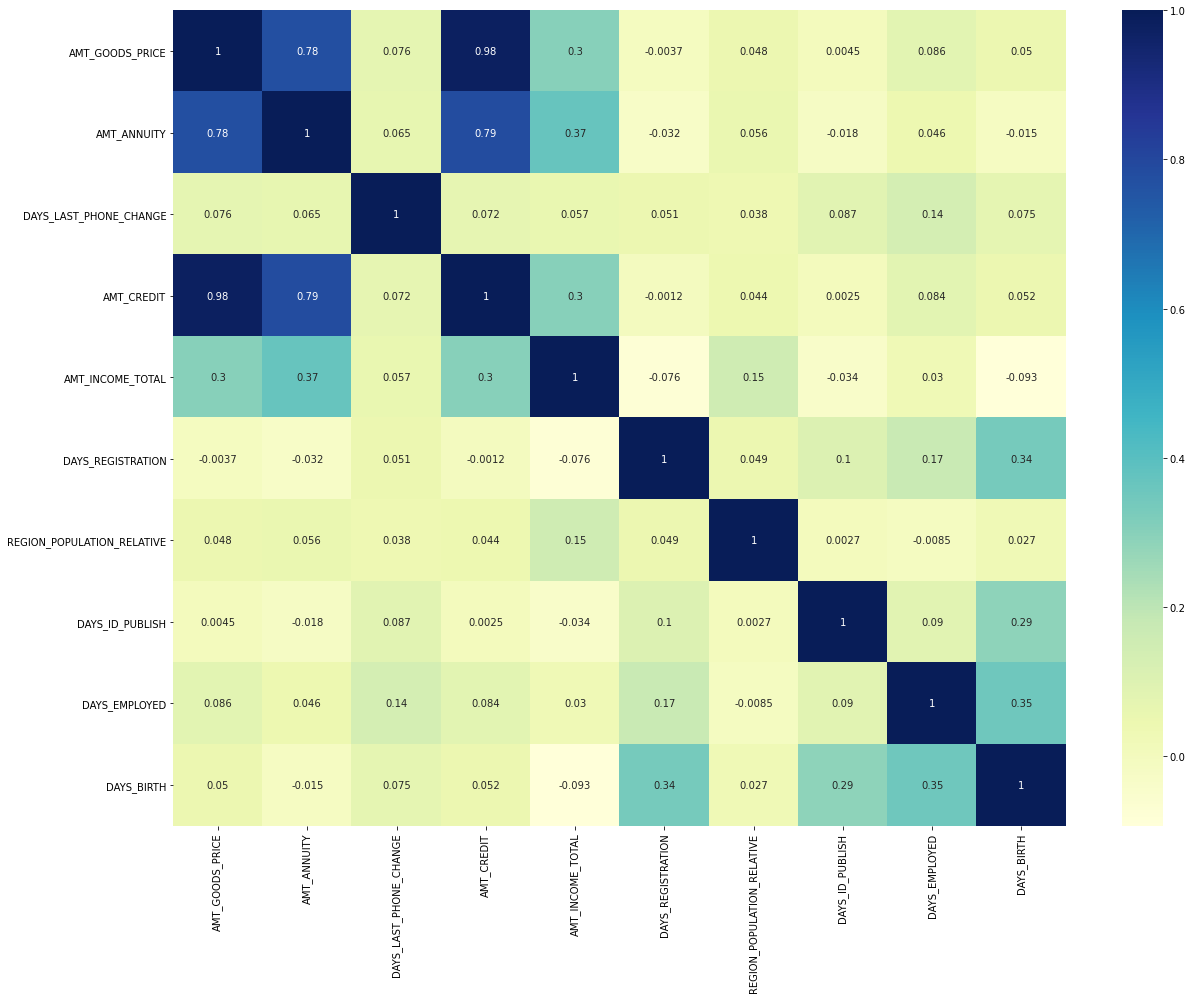

In [64]:
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()